In [45]:
%matplotlib inline
%load_ext nb_black
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance

In [2]:
# !pip install networkx

In [4]:
import networkx

In [26]:
def scan_text(file_location):
    with open(file_location, 'r') as file:
        data = file.readlines()
    text = data[0].split('.')
    lines = []
    for line in text:
        lines.append(line.replace('[^a-zA-Z]', ' ').split(' '))
    lines.pop()
    
    return lines

In [8]:
def sent_similarity(line_1, line_2, stopwords = None):
    if stopwords is None:
        stopwords = []

    line_1 = [word.lower() for word in line_1]
    line_2 = [word.lower() for word in line_2]
    
    corpus = list(set(line_1 + line_2))
    
    word_vector_1 = [0] * len(corpus)
    word_vector_2 = [0] * len(corpus)
    
    for word in line_1:
        if word not in stopwords:
            word_vector_1[corpus.index(word)] += 1
    
    for word in line_2:
        if word not in stopwords:
            word_vector_2[corpus.index(word)] += 1
    
    # To make the similarity values positive(i.e., 0 to 2)
    return 1 - cosine_distance(word_vector_1, word_vector_2)

In [47]:
def create_similarity_matrix(lines, stopwords):
    similarity_matrix = np.ones((len(lines), len(lines)))

    for ind in range(len(lines)):
        for index in range(len(lines)):
            similarity_matrix[index][ind] = sent_similarity(
                lines[index], lines[ind], stopwords
            )
    plt.figure(figsize=(14, 19))
    sns.heatmap(similarity_matrix)
    plt.plot()
    return similarity_matrix

<IPython.core.display.Javascript object>

In [50]:
def summarize_text(file_location, req_sentences = 9, additional_stopwords = []):
    stopwords_ = stopwords.words('english')
    stopwords_ += (additional_stopwords)
    summarized_text_sent = []
    
    lines = scan_text(file_location)
    sent_similarity_matrix = create_similarity_matrix(lines, stopwords_)
    
    sent_graph = networkx.from_numpy_array(sent_similarity_matrix)
    sent_score = networkx.pagerank(sent_graph)
    
    sent_ranking = sorted([(sent_score[sent[0]], sent[1]) for sent in enumerate(lines)], reverse = True)
    
    for index in range(req_sentences):
        summarized_text_sent.append(' '.join(sent_ranking[index][1]))
    
    summarized_text = '. '.join(summarized_text_sent)
    
    print('The Summarized Text Of', req_sentences, 'lines :\n', summarized_text)
    print('\nHeatmap of the Similarity Matrix', '\n') 


<IPython.core.display.Javascript object>

The Summarized Text Of 9 lines :
 A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers, but not all machine learning is statistical learning.  The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Some implementations of machine learning use data and neural networks in a way that mimics the working of a biological brain.  Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning. In its application across business problems, machine learning is also referred to as predictive analytics. Machine learning (ML) is a field of inquiry devoted to understanding and building methods that "learn" â€“ that is, methods that leverage data to improve performance on some set of tasks. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisio

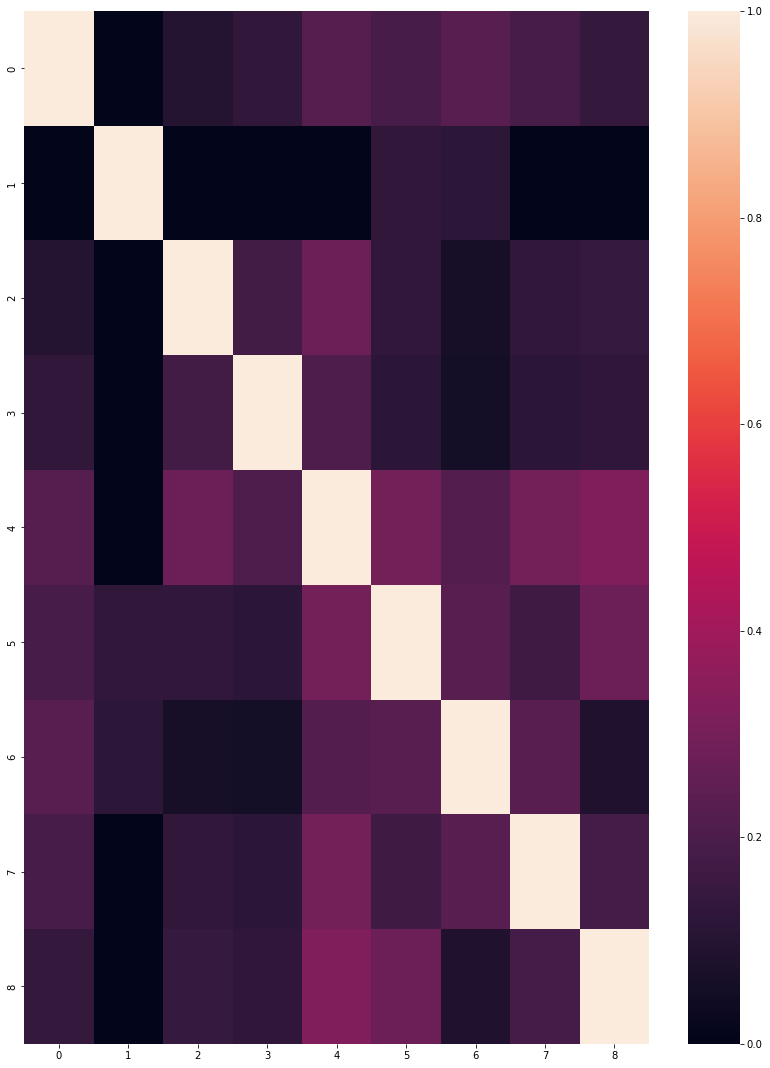

<IPython.core.display.Javascript object>

In [51]:
summarize_text("./sample_text.txt")